## LPC ANALYSIS

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jun  6 22:18:02 2021

@author: kenan
"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp
import IPython
from scipy.io import wavfile
import librosa

Write a computer program to compute the LPC coefficients for a frame of speech. Note:
You can use Durbin’s recursion

In [2]:
############################## a. Computing LPC coeffecients for a frame of speech
def bac(x, p):
    # computing the biased autocorrelation for x up to lag p
    L = len(x)
    r = np.zeros(p+1)
    for m in range(0, p+1):
        for n in range(0, L-m):
            r[m] += x[n] * x[n+m]
        r[m] /= float(L)
    return r


def ld(r, p):
    # Using the Levinson-Durbin algorithm
    g = r[1] / r[0]
    a = np.array([g])
    v = (1. - g * g) * r[0];
    for i in range(1, p):
        g = (r[i+1] - np.dot(a, r[1:i+1])) / v
        a = np.r_[ g,  a - g * a[i-1::-1] ]
        v *= 1. - g*g
    # Returning the coefficients of the filter
    return np.r_[1, -a[::-1]]


def lpc(x, p):
    # Computing p LPC coefficients for a frame of speech
    return ld(bac(x, p), p)

Compute the LPC coefficients for a voiced frame of speech using your own code. Compute
the LPC spectrum using the LPC coefficients and compare it with the DFT spectrum for the
same frame.

In [4]:
############################# b. using the code to calculate coeffecients to a voice
    
# A function for plotting
def plot_spec(x, Fs, max_freq=None, do_fft=True):
    C = int(len(x) / 2)  # positive frequencies only
    if max_freq:
        C = int(C * max_freq / float(Fs) * 2) 
    X = np.abs(np.fft.fft(x)[0:C]) if do_fft else x[0:C]
    N = Fs * np.arange(0, C) / len(x);
    plt.plot(N, X)
    return N, X

In [5]:
!git clone https://github.com/kenanmorani/Speech_Signal_Processing_idu

Cloning into 'Speech_Signal_Processing_idu'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 103 (delta 42), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (103/103), 2.53 MiB | 4.49 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [8]:
Fs_y, y = wavfile.read('./data/soundmale.wav')

In [10]:
y = y / 32767.0 # cast to floats for 16bit sound file

In [11]:
y # The voice signal

array([-1.58334502e-08, -1.95589678e-08, -2.14217267e-08, ...,
        2.79413826e-09,  1.86275884e-09, -3.72551768e-09])

In [12]:
Fs_y # The sampling rate

22050

(array([0.00000000e+00, 3.51103468e-01, 7.02206936e-01, ...,
        1.10239467e+04, 1.10242978e+04, 1.10246489e+04]),
 array([1.22718552e-05, 5.57857591e-04, 1.17473692e-03, ...,
        9.11306075e-07, 7.23391792e-07, 5.65681806e-07]))

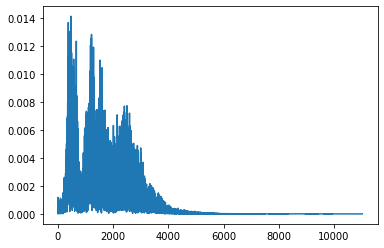

In [13]:
plot_spec(y, Fs_y) # Spectrum plot

In [14]:
# The order of the filter is 22, corresponding to a sampling rate of about 22kHz, 
# meaning about 11 formants are to be an intial expectation
lpc(y, 22) # omputing LPC of the signal using the functions in 1

array([ 1.        , -4.09689306,  7.91074887, -9.25598087,  7.43413447,
       -5.24373529,  5.07557408, -6.22603158,  6.76073116, -6.2130573 ,
        5.55991768, -5.3733616 ,  5.20335114, -4.60062949,  3.82695645,
       -3.25211723,  2.7797136 , -2.20358498,  1.60916578, -1.11343355,
        0.6949916 , -0.32138501,  0.08324006])

In [15]:
librosa.lpc(y, 22) # omputing LPC of the signal using librosa library

array([ 1.        , -4.0969337 ,  7.91095825, -9.25651305,  7.43502812,
       -5.24488063,  5.07684691, -6.22741577,  6.76228481, -6.21479692,
        5.56178693, -5.3753061 ,  5.20536071, -4.60268144,  3.82897294,
       -3.25403248,  2.78155357, -2.20540415,  1.61088708, -1.11481609,
        0.69582967, -0.32171913,  0.08330591])

(array([   0.        ,  958.69565217, 1917.39130435, 2876.08695652,
        3834.7826087 , 4793.47826087, 5752.17391304, 6710.86956522,
        7669.56521739, 8628.26086957, 9586.95652174]),
 array([ 1.        , -4.09689306,  7.91074887, -9.25598087,  7.43413447,
        -5.24373529,  5.07557408, -6.22603158,  6.76073116, -6.2130573 ,
         5.55991768]))

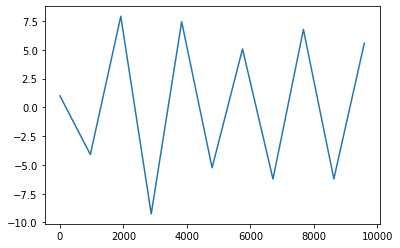

In [17]:
plot_spec(lpc(y,22), Fs_y, do_fft=False) # Computing and plotting LPC spectrum using LPC Coeffecients no fft

In [19]:
# The DFT is often computed using the FFT algorithm, a name informally used to refer to the DFT itself. 
# The DFT tells us which frequencies or “notes” to expect in our signal.
# Calculating FFT 
spectrum = np.fft.fft(y) 
spectrum 

array([-1.22718552e-05-2.84603070e-19j, -3.82508921e-04+4.06068981e-04j,
       -6.93702871e-04-9.48041752e-04j, ...,
        5.37872278e-04-3.16276245e-05j, -6.93702871e-04+9.48041752e-04j,
       -3.82508921e-04-4.06068981e-04j])

(array([0.00000000e+00, 3.51103468e-01, 7.02206936e-01, ...,
        1.10239467e+04, 1.10242978e+04, 1.10246489e+04]),
 array([1.22718552e-05, 5.57857591e-04, 1.17473692e-03, ...,
        9.11306075e-07, 7.23391792e-07, 5.65681806e-07]))

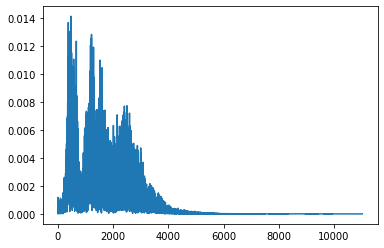

In [20]:
plot_spec(y, Fs_y, do_fft=True) # Plotting the signal with fft

(array([0.00000000e+00, 3.51103468e-01, 7.02206936e-01, ...,
        1.10239467e+04, 1.10242978e+04, 1.10246489e+04]),
 array([2.60994758e+01, 2.60994907e+01, 2.60995353e+01, ...,
        1.04342061e-02, 1.04341997e-02, 1.04341958e-02]))

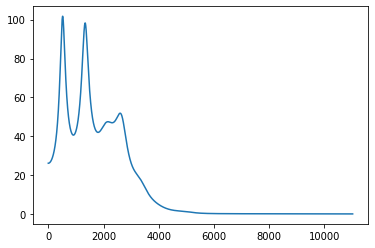

In [21]:
# Taking fft and then LPC on the frames
A = np.fft.fft(lpc(y, 22), len(y))
plot_spec(np.abs(np.divide(1.0, A)), Fs_y, do_fft=False)